## ADAM optimizer

Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks.

Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum.

For understanding the detailed mathematics refer to the link below:
https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

### RMSProp optimizer

Here, dW is derivative of cost function w.r.t weights, alpha is learning rate, beta is momentum(generally between 0.9 to 0.999)

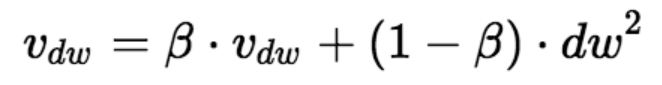

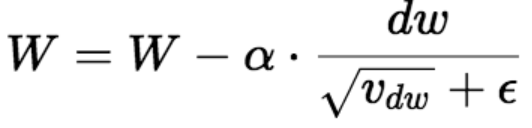

## Implementation

I have assumed stochastic funnction to be $x^{2}$-5*x + 3

In [1]:
import math

alpha = 0.0001 #learning rate
beta_1 = 0.9
beta_2 = 0.999 #initialize the values of the parameters
epsilon = 1e-8
def func(x):
    return x*x -5*x + 3
def grad_func(x): #calculates the gradient
    return 2*x - 5
theta_0 = 0 #initialize the vector
m_t = 0 
v_t = 0 
t = 0

while (1): #till it gets converged
    t+=1
    g_t = grad_func(theta_0)  #computes the gradient of the stochastic function
    m_t = beta_1*m_t + (1-beta_1)*g_t  #updates the moving averages of the gradient
    v_t = beta_2*v_t + (1-beta_2)*(g_t*g_t)  #updates the moving averages of the squared gradient
    m_cap = m_t/(1-(beta_1**t))  #calculates the bias-corrected estimates
    v_cap = v_t/(1-(beta_2**t))  #calculates the bias-corrected estimates
    theta_0_prev = theta_0
    theta_0 = theta_0 - (alpha*m_cap)/(math.sqrt(v_cap)+epsilon)  #updates the parameters
    if(theta_0 == theta_0_prev):  #checks if it is converged or not
        break